## Código Caio

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [37]:
%matplotlib inline
import parser
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
arr_t = []
arr_y = []

In [83]:
#############################
## Helper functions
#############################
def proc(t, y, string):
	"""
	Computes the equation without worry with the eval values.

	Args:
		t (float): The t value to compute the differential equation.
		y (float): The y value to compute the differential equation.
		string (string): The string containing the differential equation.
	
	Returns:
		float: The computed value in the equation.
	"""
	return eval(string)

def do_eval(t, y, expr):
    return eval(expr)

def plot_graph(f):
    """Plot the graph with matplotlib

    Args:
        f (str): The string containing the function to be ploted
    """
    plt.xlabel("t")
    plt.ylabel("f'(t)")
    plt.legend(loc="upper right")


def print_points(points, f):
	"""Plot the points of the graph
	
	Args:
	    points (list(float, float)): The list with points (t_n, y_n)
	    f (FILE): The file where you must print the points
	"""
	for idx, (t, y) in enumerate(points):
		# print(idx, y)
		log_write(str(idx) + " " + str(y))
	log_write("")

def log_write(string):
	"""
	Log in the terminal with a print and log the same data in a text file called 'saida.txt'
	
	Args:
	    string (str): The text to log
	"""
# 	print(string)
# 	with open("saida.txt", "a") as f:
# 		f.write(string + "\n")
	return

def print_in_file(method, h):
    file_out = open("saida.txt", "a")
    file_out.write("Metodo de " + str(method) + "\n")
    file_out.write("y( " + str(arr_t[0]) + " ) = " + str(arr_y[0]) + "\n")
    file_out.write("h = " + str(h) + "\n")

    for i in range(0, len(arr_y)):
        file_out.write(str(i) + " " + str(arr_y[i]) + "\n")

    file_out.write("\n")


In [5]:
#############################
## Numerical Methods
#############################
def euler_metodo(t0, y0, h, n, f):
	"""
	Computes the Euler method.
	param t0  The initial t value to use in the numerical method.
	param y0  The initial y value to use in the numerical method.
	param h   The size of the step to use in this method.
	param n   The number of steps to perform.
	param f   The differential equation.
	
	return    The list of the computed values.
	"""
	## Define os pontos
	points = []
	t, y = t0, y0

	## Calcula os passos com o método de Euler
	for i in range(0, n):
		points += [(t, y)]
		k1 = proc(t, y, f)
		y += h*k1
		t += h
	return points

In [6]:
def euler_inverso(t0, y0, h, n, f):
	"""
	Computes the Inverse Euler method.
	param t0  The initial t value to use in the numerical method.
	param y0  The initial y value to use in the numerical method.
	param h   The size of the step to use in this method.
	param n   The number of steps to perform.
	param f   The differential equation.
	
	return    The list of the computed values.
	"""
	## Define os pontos
	points = []
	t, y = t0, y0

	## Calcula os passos com o método de Euler
	for i in range(0, n):
		points += [(t, y)]
		k1 = proc(t + h, y + h*proc(t, y, f), f)
		y += h*k1
		t += h
	
	return points

In [7]:
def euler_aprimorado(t0, y0, h, n, f):
	"""
	Computes the Enhanced Euler method.
	param t0  The initial t value to use in the numerical method.
	param y0  The initial y value to use in the numerical method.
	param h   The size of the step to use in this method.
	param n   The number of steps to perform.
	param f   The differential equation.
	
	return    The list of the computed values.
	"""
	## Define os pontos
	points = []
	t, y = t0, y0

	## Calcula os passos com o método de Euler
	for i in range(0, n):
		points += [(t, y)]
		k1 = proc(t, y, f)
		k2 = proc(t + h, y + h*k1, f)
		y += h*(k1+k2)/2
		t += h
		
	return points

In [8]:
def runge_kutta(t0, y0, h, n, f):
	"""
	This method computes the aproximation of a differential equation based in the Runge-Kutta computational method.
	param t0 The initial point to start the numerical aproximation.
	param y0 The initial value of the function in the aproximation.
	param h  The step length for aproximation.
	param n  The number of steps to take in the aproximation.
	param f  The differential equation to aproximate.
	
	return   The set of points computed in the numerical aproximation.
	"""

	## Define os pontos
	points = []
	t, y = t0, y0

	## Calcula os passos com o método de Euler
	for i in range(0, n):
		points += [(t, y)]
		k1 = proc(t, y, f)
		k2 = proc(t + 0.5*h, y + 0.5*h*k1, f)
		k3 = proc(t + 0.5*h, y + 0.5*h*k2, f)
		k4 = proc(t + h, y + h*k3, f)
		y += h*(k1+2*k2+2*k3+k4)/6
		t += h
		
	return points

In [9]:
## Euler 
def euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)

        # yn+1 = yn + h*f(tn, yn)
		y0 += h*do_eval(t0, y0, expr)
		t0 += h

	return t0

In [10]:
## Euler Inverso
def backward_euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		# yn+1 = yn + h*f(tn, yn)
		y_euler = y0 + h*do_eval(t0, y0, expr) # descobre yn+1
        
		t0 += h
        
		# yn+1 = yn + h*f(tn+1, yn+1)
		y0 += h*do_eval(t0, y_euler, expr)
	
	return t0

In [11]:
## Euler Melhorado
def best_euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		# f(tn, yn)
		f_tn_yn = do_eval(t0, y0, expr)
		
		# yn+1 = yn + h*f(tn, yn)
		y_euler = y0 + h*f_tn_yn # descobre yn+1
		
		t0 += h
		
		# f(tn+1, yn+1)
		f_tn1_yn1 = do_eval(t0, y_euler, expr)
		
		# yn+1 = yn + (h/2)*(f(tn, yn) + f(tn+1, yn+1))
		y0 += (h/2)*(f_tn_yn + f_tn1_yn1)

	return t0

In [12]:
## Runge Kutta
def runge_kutta_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		### Kn1 ###
		# f(tn, yn)
		kn1 = do_eval(t0, y0, expr)

		### Kn2 ###
		# f(tn + h/2, yn + (h/2)*kn1)
		kn2 = do_eval(t0 + h/2, y0 + (h/2)*kn1, expr)

		### Kn3 ###
		# f(tn + h/2, yn + (h/2)*kn2)
		kn3 = do_eval(t0 + h/2, y0 + (h/2)*kn2, expr)

		### Kn4 ###
		# f(tn + h, yn + h*kn3)
		kn4 = do_eval(t0 + h, y0 + h*kn3, expr)
		
		# yn+1 = yn + (h/6)*(kn1 + kn2 + kn3 + kn4)
		y0 += (h/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
		t0 += h

	return t0

In [13]:
def adam_bashforth(y_set, t0, h, n, f, order):
	"""
	Computes the adams bashforth default method.
	param y_set The set containing all the y values of the method in order. 
				This parameter goes from n-k untill n in the array, means y_set[0] = y_{n-k}.
	param t0    The t value from the first step, it is the step n-k.
	param h     The step size.
	param n     Number of steps to use in the method.
	param f     The differential equation used.
	param order The order of the Adams Bashforth method. Goes from second order to the seventh order.
	
	return      The set of computed points.
	"""
	points = list(y_set)
	coeficients = [
		[3/2, -1/2],
		[23/12, -4/3, 5/12],
		[55/24, -59/24, 37/24, -3/8],
		[1901/720, -1387/360, 109/30, -637/360, 251/720],
		[4277/1440, -2641/480, 4991/720, -3649/720, 959/480, -95/288],
		[198721/60480, -18637/2520, 235183/20160, -10754/945, 135713/20160, -5603/2520, 19087/60480],
		[16083/4480, -1152169/120960, 242653/13440, 2102243/120960, -115747/13440, 32863/13440, -5257/17280]
	]

	constants = [5/12, -3/8, 251/720, -95/288, 19087/60480, -5257/17280, 1070017/3628800]
	
	if order < 1:
		raise ValueError("orders lower than 1 not supported in Adams Bashforth Method")

	elif order == 1:
		y0 = y_set[0]
		points = euler_method(t0, y0, h, n, f)

	else:
		for j in range(0, n - order):  # iterate untill the last point from prediction
			pt_set = list(reversed(points))
			total = 0
			i_limit = len(coeficients[order - 2]) - 1
			for i in range(0, len(coeficients[order - 2])):
				total += coeficients[order - 2][i]*proc(t0 + h*(j+ (i_limit - i)), pt_set[i], f)
			val = pt_set[0] + h*total
			# val -= constants[order - 2]*h
			points.append(val)
		
		points = [(t0 + idx*h, y) for idx, y in enumerate(points)]
	
	return points

In [14]:
def adam_multon(y_set, t0, h, n, f, order, function=None):
	"""
	Computes the adams multon default method.
	param y_set    The set containing all the y values of the method in order. 
				   This parameter goes from n-k untill n in the array, means y_set[0] = y_{n-k}.
	param t0       The t value from the first step, it is the step n-k.
	param h        The step size.
	param n        Number of steps to use in the method.
	param f        The differential equation used.
	param order    The order of the Adams Bashforth method. Goes from second order to the seventh order.
	param function The function to compute the next point to use as inference for the derivative computation.
	
	return      The set of computed points.
	"""
	points = list(y_set)

	coeficients = [
		[1/2, 1/2],
		[5/12, 2/3, -1/12],
		[3/8, 19/24, -5/24, 1/24],
		[251/720, 323/360, -11/30, 53/360, -19/720],
		[95/288, 1427/1440, -133/240, 241/720, -173/1440, 3/160],
		[19087/60480, 2713/2520, -15487/20160, 586/945, -6737/20160, 263/2520, -863/60480],
		[5257/17280, 139849/120960, -4511/4480, 123133/120960, -88547/120960, 1537/4480, -11351/120960, 275/24192]
	]

	constants = [-1/2, 1/24, -19/720, 3/160, -863/60480, 275/24192, 33953/3628800]

	if order < 1:
		raise ValueError("orders lower than 1 not supported in Adams Multon Method")

	elif order == 1:
		y0 = y_set[0]
		points = euler_inverso(t0, y0, h, n, f)

	else:
		for j in range(0, n - order + 1): # iterate untill the last point from prediction
			pt_set = list(reversed(points))
			total = 0

			i_limit = len(coeficients[order - 2]) - 1
			for i in range(0, len(coeficients[order - 2]) - 1):
				total += coeficients[order - 2][i + 1]*proc(t0 + h*(j+ (i_limit - i - 1)), pt_set[i], f)

			## get the next step
			mx = min(len(pt_set), 8)
			lst = list(reversed(pt_set[:mx]))
			t_val = t0 + h*(max(len(pt_set) - mx, 0))
			# n_set = adam_bashforth(lst, t_val, h, mx + 1, f, mx - 1)
			if function == None:
				n_set = euler_inverso(t0 + h*len(pt_set), pt_set[0], h, 2, f)
			else:
				n_set = function(t0 + h*len(pt_set), pt_set[0], h, 2, f)
			
			## retrive the predicted point
			_, y_val = n_set[-1]

			## Add the last point
			total += coeficients[order - 2][0]*proc(t0 + h*(j+i_limit), y_val, f) # them add the predicted point

			val = pt_set[0] + h*total
			# val += constants[order - 1]
			points.append(val)
		
		points = [(t0 + idx*h, y) for idx, y in enumerate(points)]

	return points

In [15]:
def formula_inversa(y_set, t0, h, n, f, order, function=None):
	"""
	Computes the adams multon default method.
	param y_set    The set containing all the y values of the method in order. 
				   This parameter goes from n-k untill n in the array, means y_set[0] = y_{n-k}.
	param t0       The t value from the first step, it is the step n-k.
	param h        The step size.
	param n        Number of steps to use in the method.
	param f        The differential equation used.
	param order    The order of the Adams Bashforth method. Goes from second order to the seventh order.
	param function The function to compute the next point to use as inference for the derivative computation.
	
	return      The set of computed points.
	"""
	points = list(y_set)

	coeficients = [
		[1, 1],
		[4/3, -1/3, 2/3],
		[18/11, -9/11, 2/11, 6/11],
		[48/25, -36/25, 16/25, -3/25, 12/25],
		[300/137, -300/137, 200/137, -75/137, 12/137, 60/137],
		[360/147, -450/147, 400/147, -225/147, 72/147, -10/147, 60/147]
	]

	for j in range(0, n - order + 1):
		pt_set = list(reversed(points))
		total = 0

		# computes the before points values
		for i in range(0, order - 1):
			total += pt_set[i]*coeficients[order - 1][i]

		# here we suppose the next stop from adams
		mn = min(8, len(pt_set))
		y_set = list(reversed(pt_set[:mn]))
		t_val = t0 + h*abs(len(y_set) - mn)
		# _, y_val = adam_bashforth(y_set, t_val, h, mn + 1, f, mn - 1)[-1]
		if function == None:
			_, y_val = runge_kutta(t0 + h*len(pt_set), pt_set[0], h, 2, f)[-1]
		else:
			_, y_val = function(t0 + h*len(pt_set), pt_set[0], h, 2, f)[-1]

		# The differential value computed
		other = h*coeficients[order - 1][-1]*proc(t0 + h*len(pt_set), y_val, f)

		val = total + other
		points.append(val)

	points = [(t0 + h*idx, y) for idx, y in enumerate(points)]

	return points

In [16]:
## Adams Bashforth - ordem 2
def ab_2(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# yn+1 = yn + h*((3/2)*f(tn, yn) - (1/2)*f(tn-1, yn-1))
		y0 += h*((3/2)*f_tn_yn - (1/2)*f_tn1_yn1)
		t0 += h

		arr_y.append(y0)


In [17]:
## Adams Bashforth - ordem 3
def ab_3(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# yn+1 = yn + h*((23/12)*f(tn, yn) - (4/3)*f(tn-1, yn-1) + (5/12)*f(tn-2, yn-2))
		y0 += h*((23/12)*f_tn_yn - (4/3)*f_tn1_yn1 + (5/12)*f_tn2_yn2)
		t0 += h

		arr_y.append(y0)


In [18]:
## Adams Bashforth - ordem 4
def ab_4(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# yn+1 = yn + h*((55/24)*f(tn, yn) - (59/24)*f(tn-1, yn-1) + (37/24)*f(tn-2, yn-2) - (3/8)*f(tn-3, yn-3))
		y0 += h*((55/24)*f_tn_yn - (59/24)*f_tn1_yn1 + (37/24)*f_tn2_yn2 - (3/8)*f(tn-3, yn-3))
		t0 += h

		arr_y.append(y0)


In [19]:
## Adams Bashforth - ordem 5
def ab_5(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# yn+1 = yn + h*((1901/720)*f(tn, yn) - (1387/360)*f(tn-1, yn-1) + (109/30)*f(tn-2, yn-2) - (637/360)*f(tn-3, yn-3) + (251/720)*f(tn-4, yn-4))
		y0 += h*((1901/720)*f_tn_yn - (1387/360)*f_tn1_yn1 + (109/30)*f_tn2_yn2 - (637/360)*f_tn3_yn3 + (251/720)*f_tn4_yn4)
		t0 += h

		arr_y.append(y0)


In [20]:
## Adams Bashforth - ordem 6
def ab_6(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# yn+1 = yn + h*((4277/1440)*f(tn, yn) - (2641/480)*f(tn-1, yn-1) + (4991/720)*f(tn-2, yn-2) - (3649/720)*f(tn-3, yn-3) + (959/480)*f(tn-4, yn-4) - (95/288)*f(tn-5, yn-5))
		y0 += h*((4277/1440)*f_tn_yn - (2641/480)*f_tn1_yn1 + (4991/720)*f_tn2_yn2 - (3649/720)*f_tn3_yn3 + (959/480)*f_tn4_yn4 - (95/288)*f_tn5_yn5)
		t0 += h

		arr_y.append(y0)


In [21]:
## Adams Bashforth - ordem 7
def ab_7(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# f(tn-6, yn-6)
		f_tn6_yn6 = do_eval(arr_t[len(arr_y) - 7], arr_y[len(arr_y) - 7], expr)

		# yn+1 = yn + h*((198721/60480)*f(tn, yn) - (18637/2520)*f(tn-1, yn-1) + (235183/20160)*f(tn-2, yn-2) - (10754/945)*f(tn-3, yn-3) + (135713/20160)*f(tn-4, yn-4) - (5603/2520)*f(tn-5, yn-5) + (19087/60480)*f(tn-6, yn-6))
		y0 += h*((198721/60480)*f_tn_yn - (18637/2520)*f_tn1_yn1 + (235183/20160)*f_tn2_yn2 - (10754/945)*f_tn3_yn3 + (135713/20160)*f_tn4_yn4 - (5603/2520)*f_tn5_yn5 + (19087/60480)*f_tn6_yn6)
		t0 += h

		arr_y.append(y0)

In [22]:
## Adams Bashforth - ordem 8
def ab_8(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# f(tn-6, yn-6)
		f_tn6_yn6 = do_eval(arr_t[len(arr_y) - 7], arr_y[len(arr_y) - 7], expr)
		
		# f(tn-6, yn-6)
		f_tn7_yn7 = do_eval(arr_t[len(arr_y) - 8], arr_y[len(arr_y) - 8], expr)

		#yn+1 = yn + h*((16083/4480)*f(tn, yn) - (1152169/120960)*f(tn-1, yn-1) + (242653/13440)*f(tn-2, yn-2) - (296053/13440)*f(tn-3, yn-3) + (2102243/120960)*f(tn-4, yn-4) - (115747/13440)*f(tn-5, yn-5) + (32863/13440)*f(tn-6, yn-6) - (5257/17280)*f(tn-7, yn-7))
		y0 += h*((16083/4480)*f_tn_yn - (1152169/120960)*f_tn1_yn1 + (242653/13440)*f_tn2_yn2 - (296053/13440)*f_tn3_yn3 + (2102243/120960)*f_tn4_yn4 - (115747/13440)*f_tn5_yn5 + (32863/13440)*f_tn6_yn6 - (5257/17280)*f_tn7_yn7)
		t0 += h

		arr_y.append(y0)


In [23]:
## Adams Bashforth - Chamadas
def adams_bashforth_method(t0, h, n, fty, order):
    
	# yn+1 = yn + h*((3/2)*f(tn, yn) - (1/2)*f(tn-1, yn-1))
	if order == 2:
		ab_2(t0, h, n, fty)

	# yn+1 = yn + h*((23/12)*f(tn, yn) - (4/3)*f(tn-1, yn-1) + (5/12)*f(tn-2, yn-2))
	elif order == 3:
		ab_3(t0, h, n, fty)

	# yn+1 = yn + h*((55/24)*f(tn, yn) - (59/24)*f(tn-1, yn-1) + (37/24)*f(tn-2, yn-2) - (3/8)*f(tn-3, yn-3))
	elif order == 4:
		ab_4(t0, h, n, fty)

	# yn+1 = yn + h*((1901/720)*f(tn, yn) - (1387/360)*f(tn-1, yn-1) + (109/30)*f(tn-2, yn-2) - (637/360)*f(tn-3, yn-3) + (251/720)*f(tn-4, yn-4))
	elif order == 5:
		ab_5(t0, h, n, fty)

	# yn+1 = yn + h*((4277/1440)*f(tn, yn) - (2641/480)*f(tn-1, yn-1) + (4991/720)*f(tn-2, yn-2) - (3649/720)*f(tn-3, yn-3) + (959/480)*f(tn-4, yn-4) - (95/288)*f(tn-5, yn-5))
	elif order == 6:
		ab_6(t0, h, n, fty)

	# yn+1 = yn + h*((198721/60480)*f(tn, yn) - (18637/2520)*f(tn-1, yn-1) + (235183/20160)*f(tn-2, yn-2) - (10754/945)*f(tn-3, yn-3) + (135713/20160)*f(tn-4, yn-4) - (5603/2520)*f(tn-5, yn-5) + (19087/60480)*f(tn-6, yn-6))
	elif order == 7:
		ab_7(t0, h, n, fty)
	
	#yn+1 = yn + h*((16083/4480)*f(tn, yn) - (1152169/120960)*f(tn-1, yn-1) + (242653/13440)*f(tn-2, yn-2) - (296053/13440)*f(tn-3, yn-3) + (2102243/120960)*f(tn-4, yn-4) - (115747/13440)*f(tn-5, yn-5) + (32863/13440)*f(tn-6, yn-6) - (5257/17280)*f(tn-7, yn-7))
	elif order == 8:
		ab_8(t0, h, n, fty)


In [24]:
## Fórmula Inversa - ordem 2
def bf_2(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]

		# yn+1 = (4/3)*yn - (1/3)*yn-1 + (2/3)*h*f(tn+1, yn+1)
		y0 = (4/3)*yn - (1/3)*yn1 + (2/3)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [25]:
## Fórmula Inversa - ordem 3
def bf_3(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn+1 = (18/11)*yn - (9/11)*yn-1 + (2/11)*yn-2 + (6/11)*h*f(tn+1, yn+1)
		y0 = (18/11)*yn - (9/11)*yn1 + (2/11)*yn2 + (6/11)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [26]:
## Fórmula Inversa - ordem 4
def bf_4(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn+1 = (48/25)*yn - (36/25)*yn-1 + (16/25)*yn-2 - (3/25)*yn-3 + (12/25)*h*f(tn+1, yn+1)
		y0 = (48/25)*yn - (36/25)*yn1 + (16/25)*yn2 - (3/25)*yn3 + (12/25)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [27]:
## Fórmula Inversa - ordem 5
def bf_5(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn-4
		yn4 = arr_y[len(arr_y) - 5]

		# yn+1 = (300/137)*yn - (300/137)*yn-1 + (200/137)*yn-2 - (75/137)*yn-3 + (12/137)*yn-4 + (60/137)*h*f(tn+1, yn+1)
		y0 = (300/137)*yn - (300/137)*yn1 + (200/137)*yn2 - (75/137)*yn3 + (12/137)*yn4 + (60/137)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [28]:
## Fórmula Inversa - ordem 6
def bf_6(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn-4
		yn4 = arr_y[len(arr_y) - 5]
		
		# yn-5
		yn5 = arr_y[len(arr_y) - 6]

		# yn+1 = (360/147)*yn - (450/147)*yn-1 + (400/147)*yn-2 - (225/147)*yn-3 + (72/147)*yn-4 - (10/147)*yn-5 + (60/147)*h*f(tn+1, yn+1)
		y0 = (360/147)*yn - (450/147)*yn1 + (400/147)*yn2 - (225/147)*yn3 + (72/147)*yn4 - (10/147)*yn5 + (60/147)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [29]:
## Fórmula Inversa - Chamadas
def backward_formulas_method(t0, h, n, fty, order):
	# yn+1 = (4/3)*yn - (1/3)*yn-1 + (2/3)*h*f(tn+1, yn+1)
	if order == 2:
		bf_2(t0, h, n, fty)

	# yn+1 = (18/11)*yn - (9/11)*yn-1 + (2/11)*yn-2 + (6/11)*h*f(tn+1, yn+1)
	elif order == 3:
		bf_3(t0, h, n, fty)

	# yn+1 = (48/25)*yn - (36/25)*yn-1 + (16/25)*yn-2 - (3/25)*yn-3 + (12/25)*h*f(tn+1, yn+1)
	elif order == 4:
		bf_4(t0, h, n, fty)

	# yn+1 = (300/137)*yn - (300/137)*yn-1 + (200/137)*yn-2 - (75/137)*yn-3 + (12/137)*yn-4 + (60/137)*h*f(tn+1, yn+1)
	elif order == 5:
		bf_5(t0, h, n, fty)

	# yn+1 = (360/147)*yn - (450/147)*yn-1 + (400/147)*yn-2 - (225/147)*yn-3 + (72/147)*yn-4 - (10/147)*yn-5 + (60/147)*h*f(tn+1, yn+1)
	elif order == 6:
		bf_6(t0, h, n, fty)

In [30]:
def detect_method(line):
    """Summary

    Args:
        line (TYPE): Description
    """
    method = line.split(" ")[0]
    route_method(method, line)
    pass

def route_method(line):
    """
    Select the method to execute based in the name of the method

    Args:
        line (string): The original line containing the user data

    Returns:
        list: The list of the points
    """
    points = []
    method = line.split(' ')[0]
    strin = line.split(' ')
    
    global arr_y
    global arr_t

    arr_y.clear()
    arr_t.clear()
    strmethod = ""

    ## Gen the string default from the line
    inputString = line.replace('\n', '').replace('\r', '')
    inputString = ' '.join(inputString.split(' ')[1:])

    if method == "euler":
        # print("Metodo de Euler")
        log_write("Metodo de Euler")
        y0, t0, h, n, f = inputString.split(" ")
        y0, t0, h, n = float(y0), float(t0), float(h), int(n)

        # print("y(", t0, ")")
        string = "y(" + str(t0) + ")"
        log_write(string)
        # print("h =", h)
        string = "h =" + str(h)
        log_write(string)
        points = euler_metodo(t0, y0, h, n + 1, f)

    elif method == "euler_inverso":
        # print("Metodo de Euler Inverso")
        log_write("Metodo de Euler Inverso")
        y0, t0, h, n, f = inputString.split(" ")
        y0, t0, h, n = float(y0), float(t0), float(h), int(n)

        # print("y(", t0, ")")
        string = "y(" + str(t0) + ")"
        log_write(string)
        # print("h =", h)
        string = "h =" + str(h)
        log_write(string)
        points = euler_inverso(t0, y0, h, n + 1, f)

    elif method == "euler_aprimorado":
        # print("Metodo de Euler Aprimorado")
        log_write("Metodo de Euler Aprimorado")
        y0, t0, h, n, f = inputString.split(" ")
        y0, t0, h, n = float(y0), float(t0), float(h), int(n)

        # print("y(", t0, ")")
        string = "y(" + str(t0) + ")"
        log_write(string)
        # print("h =", h)
        string = "h =" + str(h)
        log_write(string)
        points = euler_aprimorado(t0, y0, h, n + 1, f)

    elif method == "runge_kutta":
        # print("Metodo de Runge-Kutta")
        log_write("Metodo de Runge-Kutta")
        y0, t0, h, n, f = inputString.split(" ")
        y0, t0, h, n = float(y0), float(t0), float(h), int(n)

        # print("y(", t0, ")")
        string = "y(" + str(t0) + ")"
        log_write(string)
        # print("h =", h)
        string = "h =" + str(h)
        log_write(string)
        points = runge_kutta(t0, y0, h, n + 1, f)

    elif strin[0] == "adam_bashforth":
        order_str = strin[len(strin) - 1].split("\n")
        order = int(order_str[0])

        arr_y = [float(a) for a in strin[1:order + 1]]

        t0 = strin[order + 1]
        h = strin[order + 2]
        n = strin[order + 3]
        fty = strin[order + 4]

        t0 = float(t0)
        h = float(h)

        for i in range(0, len(arr_y)):
            arr_t.append(t0)
            t0 += h

        adams_bashforth_method(t0, h, int(n), fty, int(order))

        strmethod = "Adams Bashforth " + str(order) + " ordem"
        print_in_file(strmethod, h)

        points = list(zip(arr_t, arr_y))

    elif strin[0] == "adam_bashforth_by_euler" or strin[0] == "adam_bashforth_by_euler_inverso" or strin[0] == "adam_bashforth_by_euler_aprimorado" or strin[0] == "adam_bashforth_by_runge_kutta":
        y0 = strin[1]
        t0 = strin[2]
        h = strin[3]
        n = strin[4]
        fty = strin[5]
        order = strin[6].split("\n")

        if strin[0] == "adam_bashforth_by_euler":
            t0 = euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
            adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler"
            print_in_file(strmethod, h)

        elif strin[0] == "adam_bashforth_by_euler_inverso":
            t0 = backward_euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
            adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler Inverso"
            print_in_file(strmethod, h)

        elif strin[0] == "adam_bashforth_by_euler_aprimorado":
            t0 = best_euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
            adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler Aprimorado"
            print_in_file(strmethod, h)

        elif strin[0] == "adam_bashforth_by_runge_kutta":
            t0 = runge_kutta_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
            adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Adams Bashforth " + str(order[0])
            print_in_file(strmethod, h)

        points = list(zip(arr_t, arr_y))

    elif method == "adam_multon":
        # print("Metodo Adam-Multon")
        log_write("Metodo Adam-Multon")
        t0, h, n, f, order = inputString.split(" ")[-5:] ## The last five elements
        t0, h, n, order = float(t0), float(h), int(n), int(order)

        y_set = inputString.split(" ")[:-5]
        y_set = [float(a) for a in y_set]

        # print("y(", t0, ")")
        string = "y(" + str(t0) + ")"
        log_write(string)
        # print("h =", h)
        string = "h =" + str(h)
        log_write(string)
        points = adam_multon(y_set, t0, h, n + 1, f, order)

    elif method == "adam_multon_by_euler":
        # print("Metodo Adam-Multon por Euler")
        log_write("Metodo Adam-Multon por Euler")
        y0, t0, h, n, f, order = inputString.split(" ")
        y0, t0, h, n, order = float(y0), float(t0), float(h), int(n), int(order)

        points = euler_metodo(t0, y0, h, order - 1, f)
        _, y_set = zip(*points)

        points = adam_multon(y_set, t0, h, n + 1, f, order)

    elif method == "adam_multon_by_euler_inverso":
        # print("Metodo Adam-Multon por Euler Inverso")
        log_write("Metodo Adam-Multon por Euler Inverso")
        y0, t0, h, n, f, order = inputString.split(" ")
        y0, t0, h, n, order = float(y0), float(t0), float(h), int(n), int(order)

        points = euler_inverso(t0, y0, h, order - 1, f)
        _, y_set = zip(*points)

        points = adam_multon(y_set, t0, h, n + 1, f, order)

    elif method == "adam_multon_by_euler_aprimorado":
        # print("Metodo Adam-Multon por Euler Aprimorado")
        log_write("Metodo Adam-Multon por Euler Aprimorado")
        y0, t0, h, n, f, order = inputString.split(" ")
        y0, t0, h, n, order = float(y0), float(t0), float(h), int(n), int(order)

        points = euler_aprimorado(t0, y0, h, order - 1, f)
        _, y_set = zip(*points)

        points = adam_multon(y_set, t0, h, n + 1, f, order)

    elif method == "adam_multon_by_runge_kutta":
        # print("Metodo Adam-Multon por Runge-Kutta")
        log_write("Metodo Adam-Multon por Runge-Kutta")
        y0, t0, h, n, f, order = inputString.split(" ")
        y0, t0, h, n, order = float(y0), float(t0), float(h), int(n), int(order)

        points = runge_kutta(t0, y0, h, order - 1, f)
        _, y_set = zip(*points)

        points = adam_multon(y_set, t0, h, n + 1, f, order)

    elif strin[0] == "formula_inversa":
        order_str = strin[len(strin) - 1].split("\n")
        order = int(order_str[0])

        arr_y = [float(a) for a in strin[1:order]]

        t0 = strin[order]
        h = strin[order + 1]
        n = strin[order + 2]
        fty = strin[order + 3]

        t0 = float(t0)
        h = float(h)

        for i in range(0, len(arr_y)):
            arr_t.append(t0)
            t0 += h

        backward_formulas_method(t0, h, int(n), fty, int(order))

        strmethod = "Formula inversa de " + str(order) + " ordem"
        print_in_file(strmethod, h)

        points = list(zip(arr_t, arr_y))

    elif strin[0] == "formula_inversa_by_euler" or strin[0] == "formula_inversa_by_euler_inverso" or strin[0] == "formula_inversa_by_euler_aprimorado" or strin[0] == "formula_inversa_by_runge_kutta":
        y0 = strin[1]
        t0 = strin[2]
        h = strin[3]
        n = strin[4]
        fty = strin[5]
        order = strin[6].split("\n")

        if strin[0] == "formula_inversa_by_euler":
            t0 = euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
            backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler"
            print_in_file(strmethod, h)

        elif strin[0] == "formula_inversa_by_euler_inverso":
            t0 = backward_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
            backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler Inverso"
            print_in_file(strmethod, h)

        elif strin[0] == "formula_inversa_by_euler_aprimorado":
            t0 = best_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
            backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler Aprimorado"
            print_in_file(strmethod, h)

        elif strin[0] == "formula_inversa_by_runge_kutta":
            t0 = runge_kutta_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
            backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

            strmethod = "Formula inversa " + str(order[0])
            print_in_file(strmethod, h)

        points = list(zip(arr_t, arr_y))

    return points

In [31]:
import os
print(os.getcwd())
def main(fname, callback):
    with open(fname, "r") as f:
        n = 0
        h = 0
        for line in f:
            ## filter any multiple spaces
            line = ' '.join(line.split('  '))
#             if 'formula_inversa' in line or 'adam_bashforth' in line:
#                 continue

            # Correct the problem from 4x -> 4*x
            # valstr = re.sub(r'([0-9])([a-z])', r'\1*\2', f) 
            points = route_method(line)
            with open("saida.txt", "a") as f:
                print_points(points, f)

            method = line.split(' ')[0]
            t_axis, y_axis = zip(*points)
            plt.plot(t_axis, y_axis, label=method)
            n = len(t_axis)
            h = float(t_axis[1] - t_axis[0])
            
            inputString = line.replace('\n', '').replace('\r', '')
            inputString = ' '.join(inputString.split(' ')[1:])
            
        x = np.arange(n)
        x = x*h
        plt.plot(x, callback(x), 'k--', label="algebraic solution")
        plot_graph("general")

/home/ubuntu/workspace/Segunda Unidade


In [32]:
def zoom_plot(fname, begin, end, callback):
    with open(fname, "r") as f:
        n = 0
        h = 0
        for line in f:
            ## filter any multiple spaces
            line = ' '.join(line.split('  '))

            # Correct the problem from 4x -> 4*x
            # valstr = re.sub(r'([0-9])([a-z])', r'\1*\2', f) 
            points = route_method(line)
            with open("saida.txt", "a") as f:
                print_points(points, f)

            method = line.split(' ')[0]
            t_axis, y_axis = zip(*points)
            plt.plot(t_axis[begin:end], y_axis[begin:end], label=method)
            n = len(t_axis)
            h = float(t_axis[1] - t_axis[0])
            
        x = np.arange(n)
        x = x[begin:end]
        x = x*h
        plt.plot(x, callback(x), 'k--', label="algebraic solution")
        plot_graph("zoom")

In [73]:
def aritmetic_error(fname, begin, end, callback):
    with open(fname, "r") as f:
        n = 0
        h = 0
        for line in f:
            ## filter any multiple spaces
            line = ' '.join(line.split('  '))

            # Correct the problem from 4x -> 4*x
            # valstr = re.sub(r'([0-9])([a-z])', r'\1*\2', f) 
            points = route_method(line)
            with open("saida.txt", "a") as f:
                print_points(points, f)

            method = line.split(' ')[0]
            t_axis, y_axis = zip(*points)
            
            n = len(t_axis)
            h = float(t_axis[1] - t_axis[0])
            
            x = np.arange(n)
            x = x*h
            error = [b - a for a, b in zip(callback(x), y_axis)]
            plt.plot(t_axis[begin:end], error[begin:end], label=method)
            
        x = np.arange(n)
        x = x[begin:end]
        x = x*h
#         plt.plot(x, callback(x), 'k--', label="algebraic solution")
        plot_graph("aritmetic error")

In [81]:
def relative_error(fname, begin, end, callback):
    with open(fname, "r") as f:
        n = 0
        h = 0
        for line in f:
            ## filter any multiple spaces
            line = ' '.join(line.split('  '))

            # Correct the problem from 4x -> 4*x
            # valstr = re.sub(r'([0-9])([a-z])', r'\1*\2', f) 
            points = route_method(line)
            with open("saida.txt", "a") as f:
                print_points(points, f)

            method = line.split(' ')[0]
            t_axis, y_axis = zip(*points)
            
            n = len(t_axis)
            h = float(t_axis[1] - t_axis[0])
            
            x = np.arange(n)
            x = x*h
            error = [b/a for a, b in zip(callback(x), y_axis)]
            plt.plot(t_axis[begin:end], error[begin:end], label=method)
            
        x = np.arange(n)
        x = x[begin:end]
        x = x*h
#         plt.plot(x, callback(x), 'k--', label="algebraic solution")
        plot_graph("relative error")

In [105]:
def rms_error(fname, callback):
    lst = []
    with open(fname, "r") as f:
        for line in f:
            ## filter any multiple spaces
            line = ' '.join(line.split('  '))

            # Correct the problem from 4x -> 4*x
            # valstr = re.sub(r'([0-9])([a-z])', r'\1*\2', f) 
            points = route_method(line)
            with open("saida.txt", "a") as f:
                print_points(points, f)

            method = line.split(' ')[0]
            t_axis, y_axis = zip(*points)
            
            n = len(t_axis)
            h = float(t_axis[1] - t_axis[0])
            
            x = np.arange(n)
            x = x*h
            error = np.sqrt(sum([(b - a)**2 for a, b in zip(callback(x), y_axis)]))
            lst += [(method, error)]
    return zip(*lst)

### Primeira Questão

#### Resolvendo a EDO a partir dos Métodos Implementados

Considerando a EDO dada na questão:

\begin{equation}
    \label{edo_com_valores}
    S'(t) + \frac{4}{100+2t} \cdot S(t) = 0
\end{equation}

Que tem como solução exata a seguinte expressão
\begin{equation}
    \label{edo_com_valores_sol_2}
    S(t) = \frac{3 \cdot 10^{5}}{(100 + 2t)^{2}}
\end{equation}  

Assumindo que as entradas utilizadas seguem o padrão abaixo
- Para euler, euler inverso, euler aprimorado e runge-kutta: método y0 t0 h n f(t,y)
- Para adams bashforth, adams multon e fórmula inversa por outros métodos: método y0 t0 h n f(t,y) ordem

E que, para tornar o gráfico legivel, calcularemos apenas os métodos de Euler, Euler Inverso, Euler Aprimorado, Runge-Kutta, Adam Bashforth e Adam Moulton por Runge-Kutta de $3^{\circ}$ e $8^{\circ}$ ordem e Fórmula Inversa por Runge-Kutta de $3^{\circ}$ e $6^{\circ}$ ordem, faremos as análises abaixo:
```
euler 30 0 0.1 1000 -4*y/(100+2*t)
euler_inverso 30 0 0.1 1000 -4*y/(100+2*t)
euler_aprimorado 30 0 0.1 1000 -4*y/(100+2*t)
runge_kutta 30 0 0.1 1000 -4*y/(100+2*t)
adam_bashforth_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 3
adam_multon_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 3
formula_inversa_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 3
adam_bashforth_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 8
adam_multon_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 8
formula_inversa_by_runge_kutta 30 0 0.1 1000 -4*y/(100+2*t) 6
```

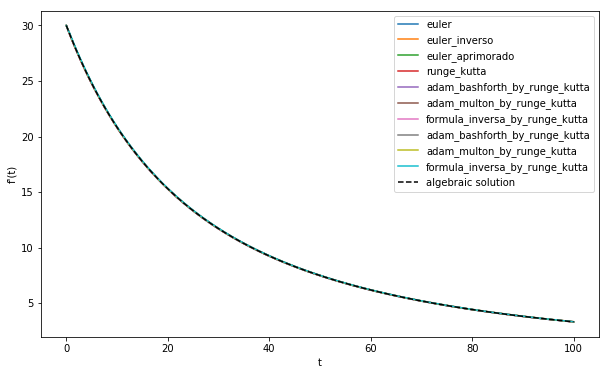

In [84]:
main("entrada_q1.txt", lambda t : 3*100000/(100 + 2*t)**2)

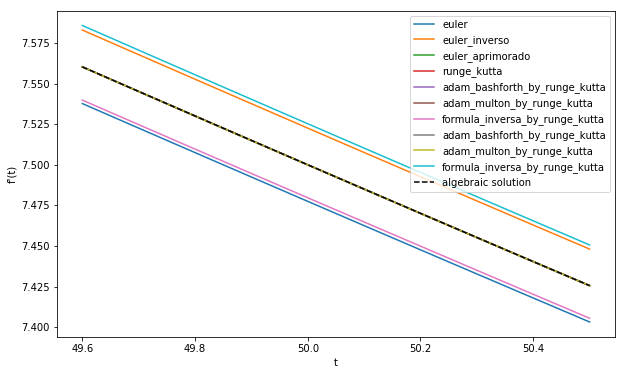

In [85]:
zoom_plot("entrada_q1.txt",496, 506, lambda t : 3*100000/(100 + 2*t)**2)

Seguindo com as análises podemos fazer um estudo sobre os erros gerados para cada método, utilizando a métrica do erro local aritmético local, o erro aritmético acumulado e procurar pelo RMS dado do erro. Esses erros serão calculados com base na expressão fundamental

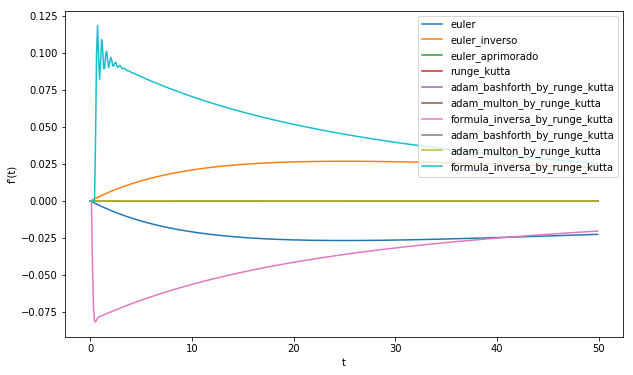

In [88]:
aritmetic_error("entrada_q1.txt", 0, 500, lambda t : 3*100000/(100 + 2*t)**2)

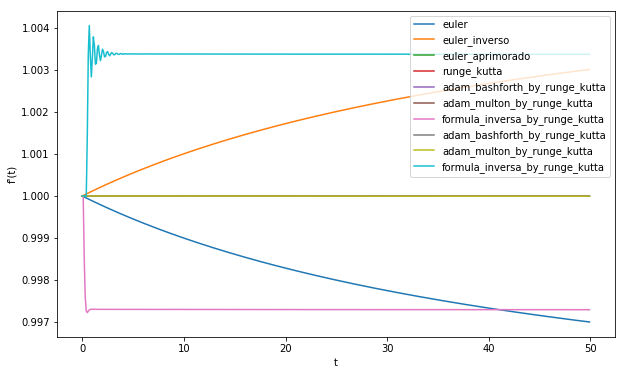

In [126]:
relative_error("entrada_q1.txt", 0, 500, lambda t : 3*100000/(100 + 2*t)**2)

A análise dos erros locais como mostrado nos revela quais métodos tendem a se manter na escala de erro, principalmente a análise de erro relativo demonstra bem os métodos que se adequam para cada situação como por exemplo a fórmula inversa por runge_kutta que para a terceira ordem tem um desvio para valores inferiores ao valor do problema e que  para a oitava ordem apresenta um desvio para valores superiores ao valor da solução real, ou mesmo  métodos como o de euler que tem um erro que vai se propagando e desviando cada vez mais da solução real.  
  
Agora vamos nos dedicar a uma breve visão sobre a heurística do RMSE(Root Mean Square Error) que é um erro muito utilizado e que é um erro aplicado no contexto global, isto é, utilizando dessa estimativa de erro é possível ter uma visão geral de como se dá a propagação de erro ao longo de todo o escopo do método, o que é muito bom, pois para simulações precisas é importante que o escopo geral do sistema seja mais preciso do que a precisão em algumas regiões, assim podemos visualizar uma estimativa do RMSE no seguinte gráfico:

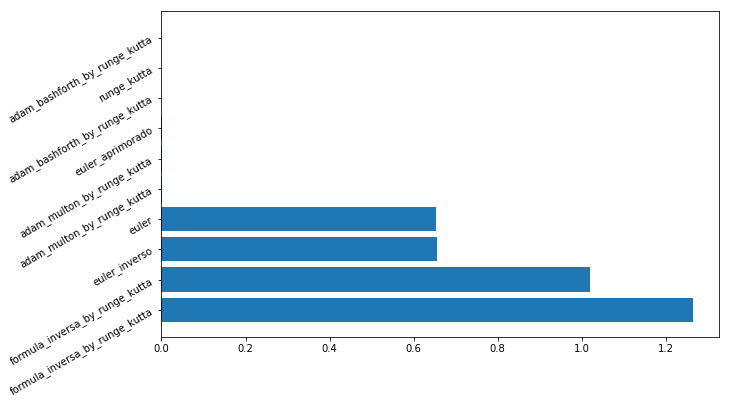

In [128]:
rows, values = rms_error("entrada_q1.txt", lambda t : 3*100000/(100 + 2*t)**2)
vals = list(zip(rows, values))
vals = sorted(vals, key=lambda a: a[1], reverse=True)
rows, values = zip(*vals)

index = np.arange(len(rows))
_ = plt.barh(index, values)
_ = plt.yticks(index, rows, fontsize=10, rotation=30)

Que demonstra que há uma grande propagação de erro no contexto global para os métodos de euler e da fórmula inversa para essa expressão buscada

### Segunda Questão

#### c) Resolvendo a EDO a partir dos Métodos Implementados

Considerando a EDO dada na questão:

\begin{equation}
    \label{eq_concentracao}
    T' = -k (T - T_{a})
\end{equation}

Assumindo que as entradas utilizadas seguem o padrão abaixo
- Para euler, euler inverso, euler aprimorado e runge-kutta: método y0 t0 h n f(t,y)
- Para adams bashforth, adams multon e fórmula inversa por outros métodos: método y0 t0 h n f(t,y) ordem

E que, para tornar o gráfico legivel, calcularemos apenas os métodos de Euler, Euler Inverso, Euler Aprimorado, Runge-Kutta, Adam Bashforth e Adam Moulton por Runge-Kutta de $3^{\circ}$ e $8^{\circ}$ ordem e Fórmula Inversa por Runge-Kutta de $3^{\circ}$ e $6^{\circ}$ ordem, faremos as análises abaixo:


#### a) 
Na letra A temos que:   
$T_{a} = 20˚C$  
$k = \frac{1}{2}\ln(\frac{10}{3})$   
$t \text{ em horas}$

Logo, a equação que será usada no projeto será
\begin{equation*}
    \label{eq_2_a_1}
    T' = -\frac{1}{2}\ln(\frac{10}{3})(T - 20)
\end{equation*}

\begin{equation}
    \label{eq_2_a_2}
    T' = 12.04-0.602T
\end{equation}

E utilizaremos também a equação exata obtida
\begin{equation}
    \label{eq_2_a_3}
    T(t) = 20 + 10e^{\frac{1}{2}\ln(\frac{10}{3})t}
\end{equation}

#### b)
Na letra B temos que:   
$T_{a} = 20˚C$  
$k = \frac{1}{20}\ln(2)$  
$t \text{ em minutos}$

Logo, a equação que será usada no projeto será
\begin{equation*}
    \label{eq_concentracao_2}
    T' = -\frac{1}{20}\ln(2)(T - 20)
\end{equation*}

\begin{equation}
    \label{eq_concentracao_3}
    T' = 0.7 - 0.035T
\end{equation}

E para realizar a dedução com a equação exata será utilizada é dada por resolver a equação diferencial
\begin{equation}
    \label{eq_concentracao_6}
    T(t) = 20 + 80e^{-\frac{1}{20}\ln(2)t}
\end{equation}

E a entrada utilizada:

``` 
euler 100 0 0.1 1000 0.7-0.035*y
euler_inverso 100 0 0.1 1000 0.7-0.035*y
euler_aprimorado 100 0 0.1 1000 0.7-0.035*y
runge_kutta 100 0 0.1 1000 0.7-0.035*y
adam_bashforth_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 3
adam_multon_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 3
formula_inversa_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 3
adam_bashforth_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 8
adam_multon_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 8
formula_inversa_by_runge_kutta 100 0 0.1 1000 0.7-0.035*y 6
```


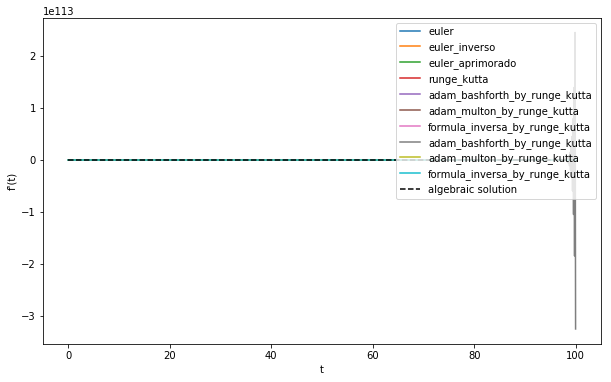

In [129]:
main("entrada_q2.txt", lambda t : 20 + 80*np.exp(-np.log(2)*t/20))

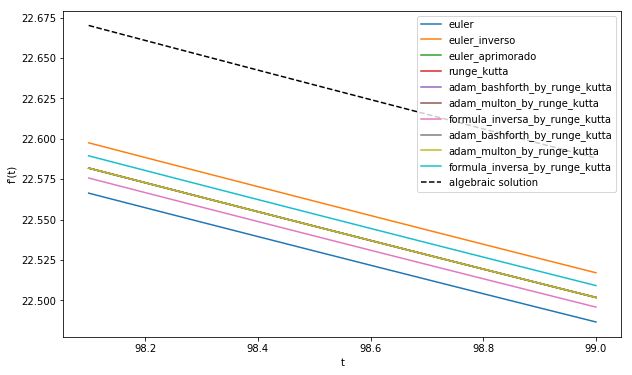

In [130]:
zoom_plot("entrada.txt", -20, -10, lambda t : 20 + 80*np.exp(-np.log(2)*t/20))

Para esse problema iremos realizar primeiramente a análise do erro global por meio do RMSE para podermos verificar o que ocorre com os métodos e ter uma triagem antes de realizar a análise dos demais erros:

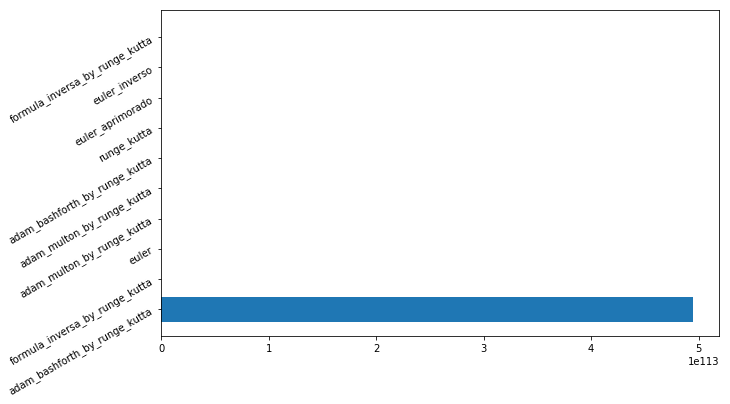

In [137]:
rows, values = rms_error("entrada_q2.txt", lambda t : 3*100000/(100 + 2*t)**2)
vals = list(zip(rows, values))
vals = sorted(vals, key=lambda a: a[1], reverse=True)
rows, values = zip(*vals)

index = np.arange(len(rows))
_ = plt.barh(index, values)
_ = plt.yticks(index, rows, fontsize=10, rotation=30)

Essa análise nos gera uma característica interessante que é o fato de que a equação com adams bashforth de oitava ordem está explodindo em relação ao erro, devido a instabilidades numéricas, então vamos remover esse método, e rodar novamente o erro global e analisar as demais heurísticas de erro

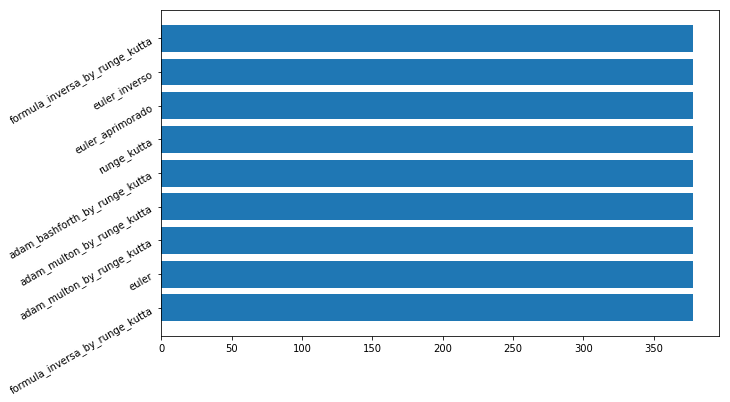

In [139]:
rows, values = rms_error("entrada_q2_1.txt", lambda t : 3*100000/(100 + 2*t)**2)
vals = list(zip(rows, values))
vals = sorted(vals, key=lambda a: a[1], reverse=True)
rows, values = zip(*vals)

index = np.arange(len(rows))
_ = plt.barh(index, values)
_ = plt.yticks(index, rows, fontsize=10, rotation=30)

Isso nos mostra que em termos gerais todos os métodos tem um erro global equivalente, o que não nos revela muito, então. Seguindo com as análises podemos fazer um estudo sobre os erros gerados para cada método, utilizando a métrica do erro local aritmético local, o erro aritmético acumulado. Esses erros serão calculados com base na expressão fundamental

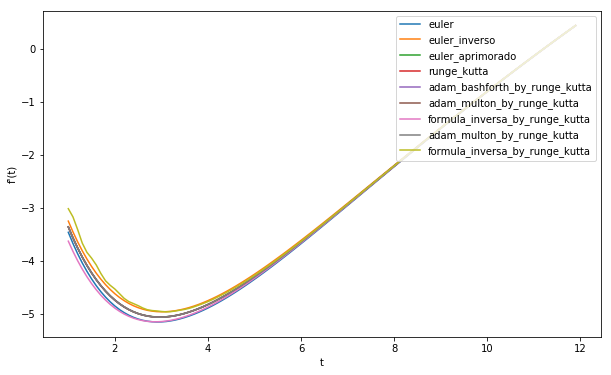

In [148]:
aritmetic_error("entrada_q2_1.txt", 10, 120, lambda t : 3*100000/(100 + 2*t)**2)

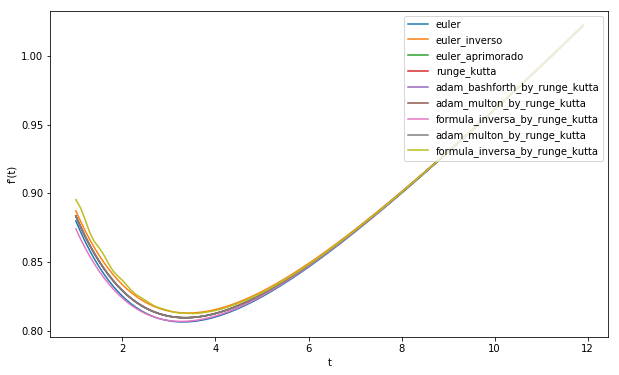

In [149]:
relative_error("entrada_q2_1.txt", 10, 120, lambda t : 3*100000/(100 + 2*t)**2)

Essas análises de erro nos mostram que o erro ele é crescente para todos os métodos e que o erro de cada um dos métodos converge assintóticamente tanto para a estimativa relativa quanto para a estimativa absoluta, o que condiz com a análise de erro global anteriormente realizada

### Terceira Questão

#### a)Resolvendo a EDO a partir dos Métodos Implementados

Considerando a EDO dada na questão:

\begin{equation}
    \label{edo_velocidade}
    v'(t) = \frac{2000 - 2v(t)}{200 - t}
\end{equation}
Com $v(0) = 0$

Que tem como solução exata a seguinte expressão
\begin{equation}
    \label{edo_final}
    v = \frac{2000 - \frac{1}{20} \cdot (200 - t)^{2}}{2}
\end{equation}

Assumindo que as entradas utilizadas seguem o padrão abaixo
- Para euler, euler inverso, euler aprimorado e runge-kutta: método y0 t0 h n f(t,y)
- Para adams bashforth, adams multon e fórmula inversa por outros métodos: método y0 t0 h n f(t,y) ordem

E que, para tornar o gráfico legivel, calcularemos apenas os métodos de Euler, Euler Inverso, Euler Aprimorado, Runge-Kutta, Adam Bashforth e Adam Moulton por Runge-Kutta de $3^{\circ}$ e $8^{\circ}$ ordem e Fórmula Inversa por Runge-Kutta de $3^{\circ}$ $6^{\circ}$ ordem, faremos as análises abaixo:

```
euler 0 0 0.5 20 (2000-2*y)/(200-t)
euler_inverso 0 0 0.5 20 (2000-2*y)/(200-t)
euler_aprimorado 0 0 0.5 20 (2000-2*y)/(200-t)
runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t)
adam_bashforth_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 3
adam_multon_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 3
formula_inversa_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 3
adam_bashforth_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 8
adam_multon_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 8
formula_inversa_by_runge_kutta 0 0 0.5 20 (2000-2*y)/(200-t) 6
```


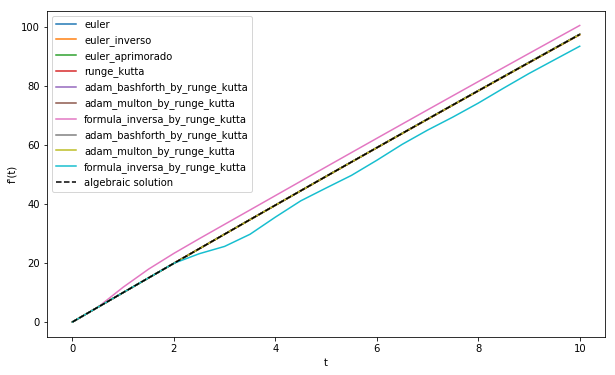

In [64]:
main("entrada_q3.txt", lambda t : (2000 - (200-t)**2/20)/2)

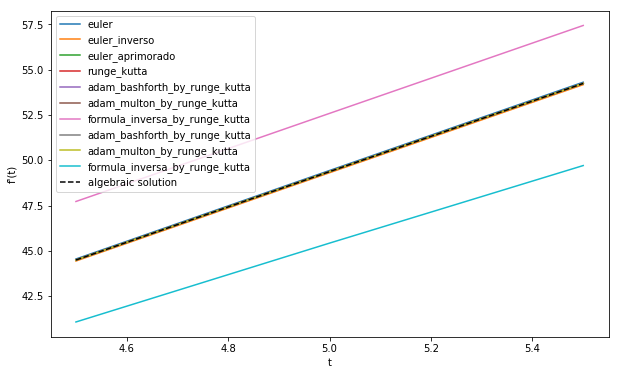

In [67]:
zoom_plot("entrada_q3.txt", 9, 12, lambda t : (2000 - (200-t)**2/20)/2)